# Visualization of Prediction Poisoning

In [11]:
import pickle
import numpy as np
queries_path = "./models/final_bb_dist/CIFAR10-vgg16_bn-mld_l1_batch32-eps1.0_bc0-CIFAR100-B50000-random_da0/queries.pickle"

with open(queries_path,'rb') as f:
    queries = pickle.load(f)

Max Perturbation Norm:  1.0
Min Perturbation Norm:  0.99999994
Mid Perturbation Norm:  1.0


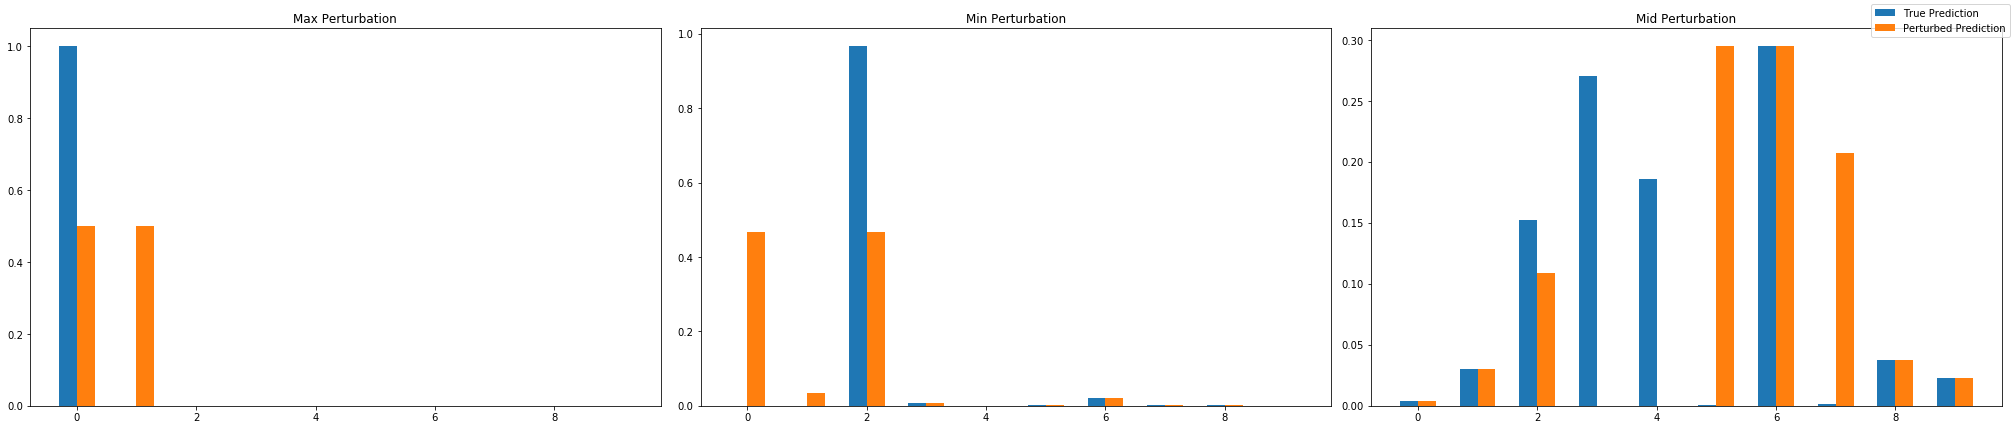

In [5]:
import matplotlib.pyplot as plt
true_label, perturbed_label,*_= queries[0]
K = true_label.shape[1]

delta = true_label-perturbed_label
delta_norm = np.linalg.norm(delta,1,axis=1)
norm_rank = np.argsort(delta_norm)
max_delta_norm_idx = norm_rank[-1]
min_delta_norm_idx = norm_rank[0]
mid_delta_norm_idx = norm_rank[K//2]
print("Max Perturbation Norm: ", delta_norm[max_delta_norm_idx])
print("Min Perturbation Norm: ", delta_norm[min_delta_norm_idx])
print("Mid Perturbation Norm: ", delta_norm[mid_delta_norm_idx])

true_label_max,perturbed_label_max = true_label[max_delta_norm_idx],perturbed_label[max_delta_norm_idx]
true_label_min,perturbed_label_min = true_label[min_delta_norm_idx],perturbed_label[min_delta_norm_idx]
true_label_mid,perturbed_label_mid = true_label[mid_delta_norm_idx],perturbed_label[mid_delta_norm_idx]

width=0.3
labels = np.arange(K)
true_label_xs = labels-width/2
perturbed_label_xs = labels+width/2

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(28,6))
ax1.bar(true_label_xs,true_label_max,label="True Prediction",width=width)
ax1.bar(perturbed_label_xs,perturbed_label_max,label="Perturbed Prediction",width=width)
ax1.set_title("Max Perturbation")

ax2.bar(true_label_xs,true_label_min,width=width)
ax2.bar(perturbed_label_xs,perturbed_label_min,width=width)
ax2.set_title("Min Perturbation")

ax3.bar(true_label_xs,true_label_mid,width=width)
ax3.bar(perturbed_label_xs,perturbed_label_mid,width=width)
ax3.set_title("Mid Perturbation")

fig.legend()
plt.tight_layout()
plt.savefig(queries_path.replace("queries.pickle","pertvis.png"))

In [1]:
import pickle
import numpy as np

num_plot=3
queries_path = "./models/final_bb_dist/CIFAR10-vgg16_bn-none-quantize1.0-CIFAR100-B50000-random_da0/queries.pickle"

with open(queries_path,'rb') as f:
    queries = pickle.load(f)

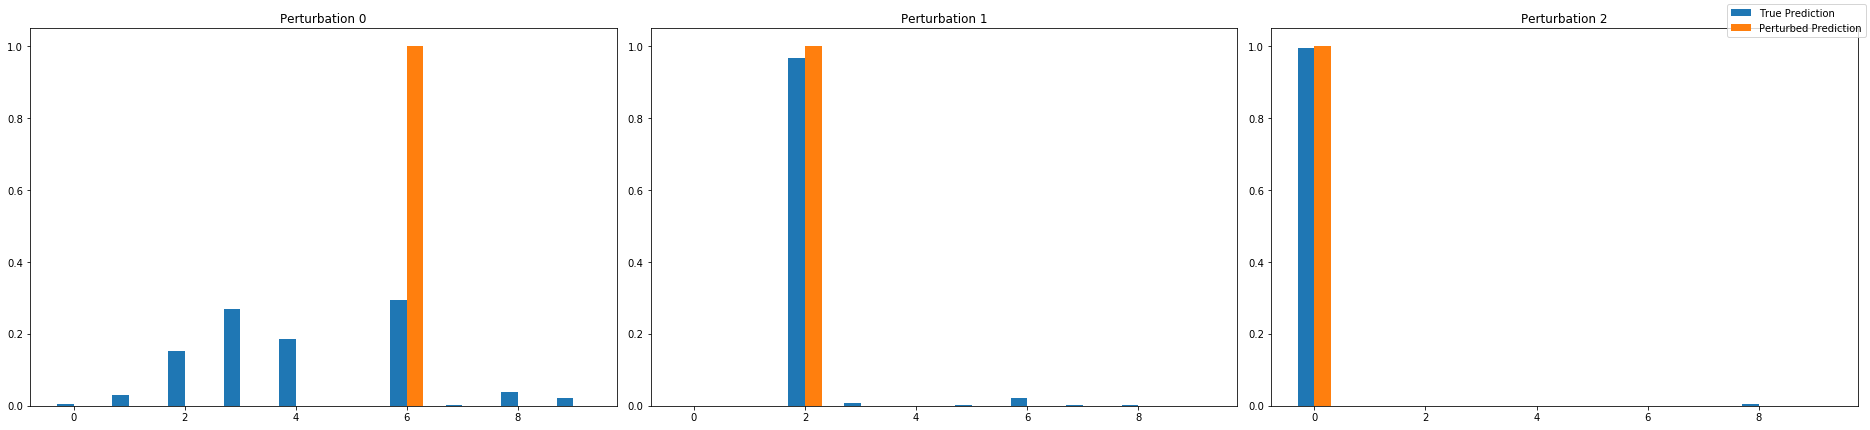

In [3]:
import matplotlib.pyplot as plt


fig,axs = plt.subplots(1,num_plot,figsize=(9*num_plot-1,6))
true_label, perturbed_label,*_ = queries[0]

if num_plot == 1:
    axs = [axs,]
for i in range(num_plot):
    

    K = true_label[i].shape[0]
    width=0.3
    labels = np.arange(K)
    true_label_xs = labels-width/2
    perturbed_label_xs = labels+width/2

    if i == 0:
        axs[i].bar(true_label_xs,true_label[i],label="True Prediction",width=width)
        axs[i].bar(perturbed_label_xs,perturbed_label[i],label="Perturbed Prediction",width=width)
    else:
        axs[i].bar(true_label_xs,true_label[i],width=width)
        axs[i].bar(perturbed_label_xs,perturbed_label[i],width=width)
    axs[i].set_title("Perturbation %d"%i)

fig.legend()
plt.tight_layout()
plt.savefig(queries_path.replace("queries.pickle","pertvis.png"))

## Curve: Loss vs KL-div

[0.23071033013263575, 0.2746741089848319, 0.31853491138435674, 0.36163303734626207, 0.4000888762379486, 0.4273113362391027, 0.46244332283945017, 0.49825244425049364, 0.5203017562875668] [0.003917681032419205, 0.004336150693893433, 0.004800477793812752, 0.005318584221601487, 0.005900184506177902, 0.006486200028657913, 0.007175219851732254, 0.007998796308040618, 0.009011003518104552]


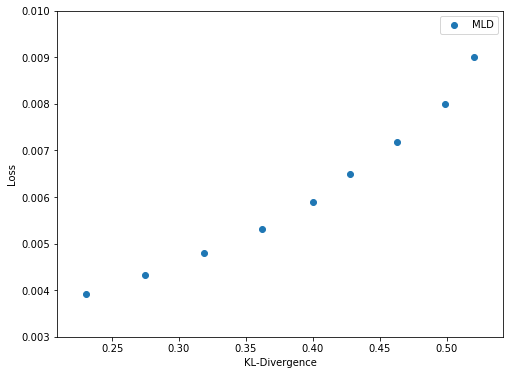

In [15]:
import matplotlib.pyplot as plt
import csv

eps = [0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
MLD_KL = []
MLD_Loss = [] 
MAD_KL = []
MAD_Loss = []

for e in eps:
    mld_out_dir = "./models/final_bb_dist/CIFAR10-vgg16_bn-mld_l1_batch32-eps{}_bc0-CIFAR100-B50000-random_da0".format(e)
    mad_out_dir = "./models/final_bb_dist/CIFAR10-vgg16_bn-mad_lp_argmax_l1_batch32-eps{}_bc0-CIFAR100-B50000-noproxy-random_da0".format(e)

    mld_dist_file = mld_out_dir + "/distancetransfer.log.tsv"
    mad_dist_file = mad_out_dir + "/distancetransfer.log.tsv"
    mld_train_file = mld_out_dir + '/models/victim/CIFAR10-vgg16_bn-train-nodefense_featfix1/train.50000.log.tsv'
    mad_train_file = mad_out_dir + '/models/victim/CIFAR10-vgg16_bn-train-nodefense_featfix1/train.50000.log.tsv'
    try:
        with open(mld_dist_file,'r') as f:
            reader = csv.reader(f,delimiter='\t')
            for r in reader:
                last_row = r
            MLD_KL.append(float(last_row[5]))
        
        with open(mld_train_file,'r') as f:
            reader = csv.reader(f,delimiter='\t')
            for r in reader:
                last_row = r
            MLD_Loss.append(float(last_row[3]))
    except:
        if len(MLD_KL)>len(MLD_Loss):
            MLD_KL = MLD_KL[:len(MAD_Loss)]
    
    try:
        with open(mad_dist_file,'r') as f:
            reader = csv.reader(f,delimiter='\t')
            for r in reader:
                last_row = r
            MAD_KL.append(float(last_row[5]))
        
        with open(mad_train_file,'r') as f:
            reader = csv.reader(f,delimiter='\t')
            for r in reader:
                last_row = r
            MAD_Loss.append(float(last_row[3]))
    except:
        if len(MAD_KL)>len(MAD_Loss):
            MAD_KL = MAD_KL[:len(MAD_Loss)]

print(MLD_KL,MLD_Loss)



figure = plt.figure(figsize=(8,6))
plt.scatter(MLD_KL,MLD_Loss,label="MLD")
#plt.scatter(MAD_KL,MAD_Loss,label="MAD")
plt.ylabel("Loss")
plt.xlabel("KL-Divergence")
plt.ylim([0.003,0.01])
plt.legend()